In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

#bn = 'worm-eggs-adam-masks+Feggs+roi128+hard-neg-5_clf+unet-simple_maxlikelihood_20190808_151948_adam_lr0.000128_wd0.0_batch64'
bn = 'AUG_worm-eggs-adam-masks+Feggs+roi128+hard-neg-5_clf+unet-simple_maxlikelihood_20190808_151948_adam_lr0.000128_wd0.0_batch64'
root_dir = Path.home() / 'workspace/WormData/egg_laying/plates/predictions/CeNDR' / bn

src_file = root_dir / 'egg_laying_rate.csv'
save_dir = root_dir / 'plots'


egg_rates = pd.read_csv(src_file)
egg_rates = egg_rates.sort_values(by = ['strain_name', 'n_worms', 'egg_laying_rate[n_eggs/min/n_worms]'])
egg_rates['delta_time[min]'].value_counts()
#egg_rates

13.333333    861
Name: delta_time[min], dtype: int64

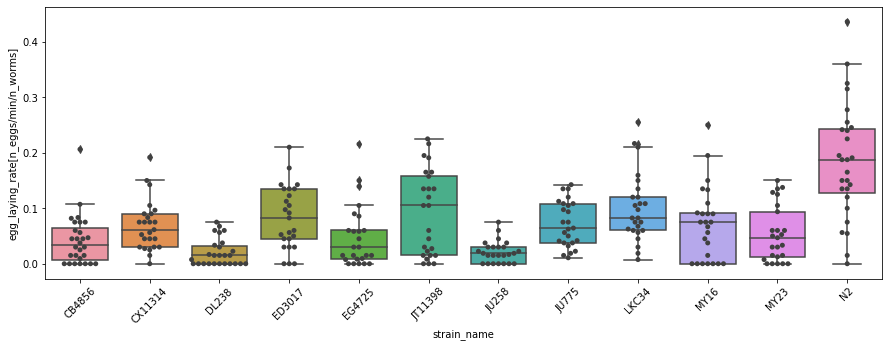

In [19]:
DIVERGENT_SET = ['CB4856', 'N2',  'DL238', 'CX11314', 'MY23', 'JU775', 'JT11398',
       'EG4725', 'LKC34', 'ED3017', 'MY16', 'JU258']

egg_rates_divergent = egg_rates[egg_rates['strain_name'].isin(DIVERGENT_SET)]

fig = plt.figure(figsize = (15, 5))
ax = sns.boxplot(x="strain_name", y="egg_laying_rate[n_eggs/min/n_worms]", data=egg_rates_divergent)
ax = sns.swarmplot(x="strain_name", y="egg_laying_rate[n_eggs/min/n_worms]", data=egg_rates_divergent, color=".25")
plt.setp(ax.get_xticklabels(), rotation=45);

fig.savefig(save_dir / 'egg_laying_rates.pdf')

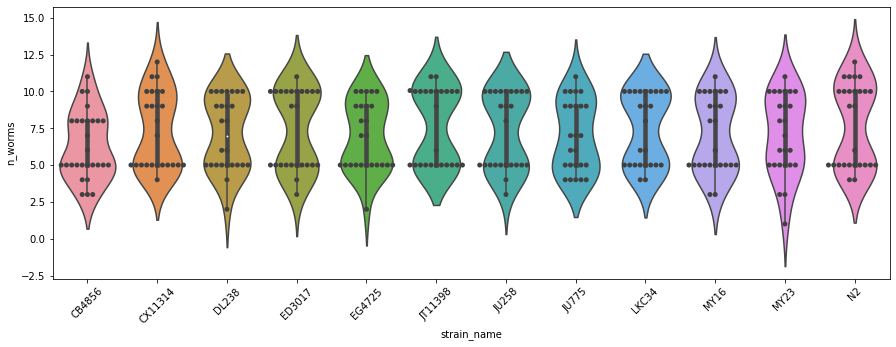

In [20]:
plt.figure(figsize = (15, 5))
ax = sns.violinplot(x="strain_name", y="n_worms", data=egg_rates_divergent)
ax = sns.swarmplot(x="strain_name", y="n_worms", data=egg_rates_divergent, color=".25")
plt.setp(ax.get_xticklabels(), rotation=45);